# Marathon Analysis
We have data on 12,000 marathons from both international countries and the USA. The data was scraped from marathonguide.com.
Each marathon contains the following information, with some exceptions for number of finishers:
- date
- location
- number of finishers, split male / female
- winning times, split male / female
- average time
- standard deviation


As per the website; "We've been at this since 2000 and have created a searchable database of virtually all Marathon results in the English speaking world." The trends presented below are based on this database being an extensive and consitent database of marathon data.

Important to note, is that 2020 is an anomoy year due to the Coronavirus issues, but I have left the data in as it is interesting to see the effect.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#first, sorting out the column types for analysis
df = pd.read_csv('marathons_clean.csv')
df['male_winner'] = pd.to_timedelta(df['male_winner'])
df['female_winner'] = pd.to_timedelta(df['female_winner'])
df['avg_finish'] = pd.to_timedelta(df['avg_finish'])
df['std'] = pd.to_timedelta(df['std'])
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)
print(len(df))

name                         object
year                          int64
month                         int64
day                           int64
date                 datetime64[ns]
location                     object
male_winner         timedelta64[ns]
female_winner       timedelta64[ns]
finishers                   float64
male_finishers              float64
female_finishers            float64
avg_finish          timedelta64[ns]
std                 timedelta64[ns]
dtype: object
12205


# Analysis on USA vs International marathons
Below is a table based off the location column; we can see that since 2001 the number of marathons logged that were based in the US has stayed roughly consistent when compared to the number logged internationally. Thus, marathons seem to have got more popular across the globe, and not just in the USA.

In [3]:
usa_count = df.groupby(('year'))['location'].apply(lambda x: x[x.str.contains('USA')].count())
total_count = df.groupby('year')['location'].count()
df_USA = pd.DataFrame({'USA_count': usa_count, 'total_count': total_count})
df_USA['percentage'] = df_USA['USA_count'] / df_USA['total_count'] * 100
print(df_USA)

      USA_count  total_count  percentage
year                                    
2000        216          220   98.181818
2001        238          295   80.677966
2002        259          323   80.185759
2003        280          351   79.772080
2004        305          387   78.811370
2005        327          420   77.857143
2006        347          452   76.769912
2007        338          433   78.060046
2008        375          477   78.616352
2009        401          500   80.200000
2010        489          624   78.365385
2011        572          715   80.000000
2012        612          754   81.167109
2013        654          803   81.444583
2014        720          869   82.853855
2015        722          866   83.371824
2016        745          896   83.147321
2017        709          859   82.537835
2018        724          893   81.075028
2019        702          859   81.722934
2020        180          209   86.124402


# Marathon Popularity

The graph shows the mean number of finishers per race, for each year from 2000-2020. It seems that the mean number has been roughly declining.


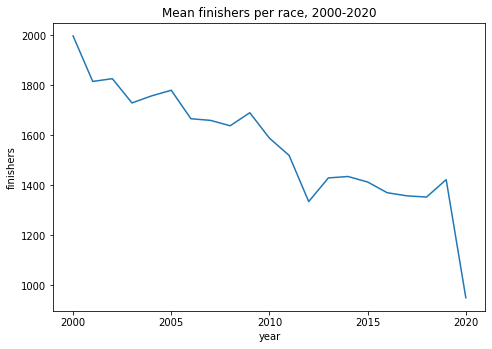

In [4]:
year_mean = df.groupby(['year'], as_index = False)['finishers'].mean()
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(year_mean['year'], year_mean['finishers'])
ax.set_xlabel('year')
ax.set_ylabel('finishers')
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
ax.set_title('Mean finishers per race, 2000-2020')
plt.show();

On first look one might assume this is because the marathon has got less popular, but this is not the case. Instead, it's the opposite; as the marathon got more popular more smaller races came about, which pulled the mean per race down. 


We can see this in the table below.

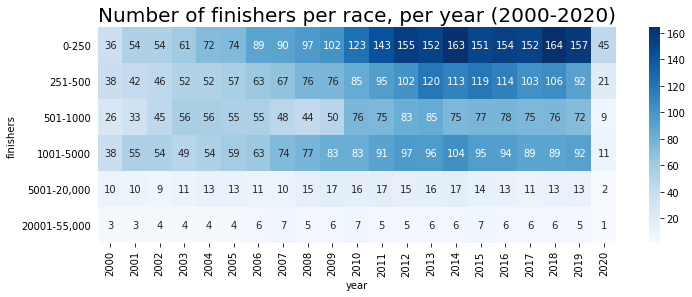

In [5]:
categories = ['0-250', '251-500', '501-1000', '1001-5000', '5001-20,000', '20001-55,000']
bins = [0, 250, 500, 1000, 5000, 20000, 55000]
df2 = (df.groupby(['year', pd.cut(df['finishers'], bins, labels=categories)])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=categories, fill_value=0))
df2_transposed = df2.transpose()
ax=plt.axes([1,1,1.5,0.75]) #resize
sns.heatmap(df2_transposed, annot=True, fmt="d", cmap="Blues", ax = ax)
plt.tick_params(axis = 'y', left = False) #remove y ticks
plt.title('Number of finishers per race, per year (2000-2020)', size = 20);

As we can see, the number of large races (5001-20,000 & 20,001-55,000) stayed roughly consistent over the years, between 13 in 2000 and 18 in 2019, with a high of 23 in 2009, 2010 & 2014. 

However, the number of races with fewer participants (0-250 & 251-500) increased drastically from 74 in 2000 up to 249 in 2019, with a high of 276 in 2014.

Furthermore, below we can see the total participation of marathons increased roughly twofold over the 00's and has held up in the 600,000s since 2010, discounting 2020 with the Coronvirus issues. 

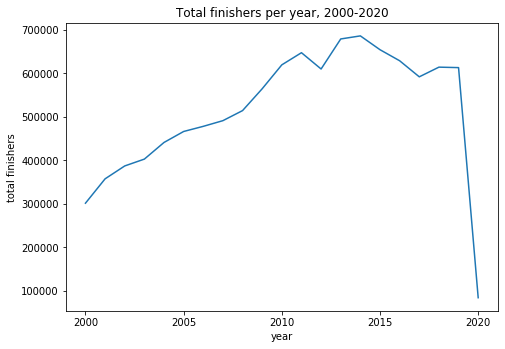

In [6]:
total_finishers = df.groupby(('year'), as_index = False)['finishers'].sum()
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(total_finishers['year'], total_finishers['finishers'])
ax.set_xlabel('year')
ax.set_ylabel('total finishers')
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
ax.set_title('Total finishers per year, 2000-2020')
plt.show();

Where we have data on the number of finishers, we also have data on the split between male and female. It would be interesting to see the gender split of participation has changed over the years. Let's analyse this:

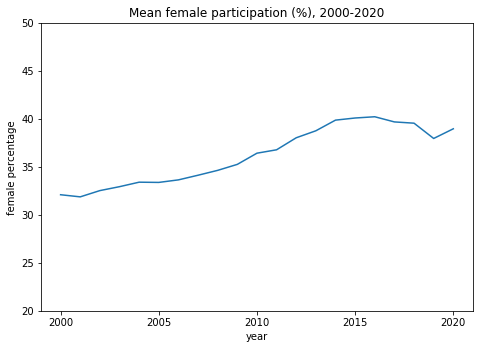

In [7]:
df['female_percentage'] = df['female_finishers'] / df['finishers'] * 100
female_percent = df.groupby(['year'], as_index = False)['female_percentage'].mean()
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(female_percent['year'], female_percent['female_percentage'])
ax.set_xlabel('year')
ax.set_ylabel('female percentage')
ax.set_ylim(20, 50)
ax.set_xticks([2000, 2005, 2010, 2015, 2020])
ax.set_title('Mean female participation (%), 2000-2020')
plt.show()

We can see that female participation has risen steadily over the years, but has an increased number of females running the marathon resulted in times getting, on average, faster?

# Marathon Timing

In [8]:
df['male_time'] = df['male_winner'] / pd.Timedelta(minutes=1) #to normalise